<a href="https://colab.research.google.com/github/simulate111/mini-project-2-Abo/blob/main/MIniProject2Reza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Conv1D, SimpleRNN
from zipfile import ZipFile
import urllib.request
import os
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [33]:
file_path = 'https://raw.githubusercontent.com/simulate111/mini-project-2-Abo/main/Sentiment140.tenPercent.sample.tweets.tsv'
df = pd.read_csv(file_path, sep='\t', header=0)
display(df.head())
df.info()

,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   sentiment_label  160000 non-null  int64 
 1   tweet_text       160000 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [34]:
sentiment_label_counts = df['sentiment_label'].value_counts()
print(sentiment_label_counts)

4    80000
0    80000
Name: sentiment_label, dtype: int64


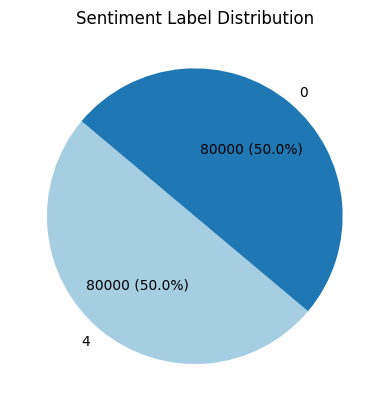

In [35]:
sentiment_label_counts = df['sentiment_label'].value_counts()
plt.pie(sentiment_label_counts, labels=sentiment_label_counts.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sentiment_label_counts.sum() / 100, p),
        startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sentiment Label Distribution')
plt.show()

In [39]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
sentiment_label    0
tweet_text         0
dtype: int64


In [40]:
df['text_length'] = df['tweet_text'].apply(len)
print("Text Length Summary:")
print(df['text_length'].describe())

Text Length Summary:
count    160000.000000
mean         74.113481
std          36.440383
min           6.000000
25%          44.000000
50%          69.000000
75%         104.000000
max         186.000000
Name: text_length, dtype: float64


In [41]:
df['sentiment_label'] = df['sentiment_label'].replace({4: 1})
display(df.head())

,sentiment_label,tweet_text,text_length
0,1,"@elephantbird Hey dear, Happy Friday to You A...",85
1,1,Ughhh layin downnnn Waiting for zeina to co...,58
2,0,"@greeniebach I reckon he'll play, even if he's...",116
3,0,@vaLewee I know! Saw it on the news!,37
4,0,very sad that http://www.fabchannel.com/ has c...,118


In [44]:
#Cleaning the data
def clean_tweet(tweet):
    tweet = re.sub(r'@[\w]+', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'[^A-Za-z0-9]+', ' ', tweet)
    tweet = ' '.join(tweet.split())
    return tweet
df['cleaned_tweet'] = df['tweet_text'].apply(clean_tweet)
display(df[['tweet_text', 'cleaned_tweet']].head())

,tweet_text,cleaned_tweet
0,"@elephantbird Hey dear, Happy Friday to You A...",Hey dear Happy Friday to You Already had your ...
1,Ughhh layin downnnn Waiting for zeina to co...,Ughhh layin downnnn Waiting for zeina to cook ...
2,"@greeniebach I reckon he'll play, even if he's...",I reckon he ll play even if he s not 100 but i...
3,@vaLewee I know! Saw it on the news!,I know Saw it on the news
4,very sad that http://www.fabchannel.com/ has c...,very sad that has closed down One of the few w...


In [47]:
# Check for null or empty content
null_cleaned_tweets = df[df['cleaned_tweet'].isnull() | (df['cleaned_tweet'] == '')]
print("Summary of Null or Empty Cleaned Tweets:")
print(null_cleaned_tweets.info())
print(f"Null values: \n\n{df.isna().sum()}")

Summary of Null or Empty Cleaned Tweets:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 183 to 159158
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment_label  330 non-null    int64 
 1   tweet_text       330 non-null    object
 2   text_length      330 non-null    int64 
 3   cleaned_tweet    330 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.9+ KB
None
Null values: 

sentiment_label    0
tweet_text         0
text_length        0
cleaned_tweet      0
dtype: int64


### Tokienization

In [58]:
tokenized_sequences = df['cleaned_tweet']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_sequences)
# Convert text data to sequences of integers
sequences = tokenizer.texts_to_sequences(tokenized_sequences)
print("Sample Sequences:", sequences[:2])
print(f"Word index length: {len(tokenizer.word_index)}")
some_words = list(tokenizer.word_index.keys())[:10]
print(f"Some words: {some_words}")

Sample Sequences: [[150, 636, 120, 322, 2, 8, 206, 66, 45, 1748, 12, 2193, 10, 358], [2194, 3973, 20681, 298, 10, 29220, 2, 1155, 523]]
Word index length: 70393
Some words: ['i', 'to', 'the', 'a', 'my', 'and', 'it', 'you', 'is', 'for']


In [59]:
X = sequences
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:", len(X_train))
print("X_test:", len(X_test))
print(" y_train:", len(y_train))
print("y_test:", len(y_test))

X_train: 128000
X_test: 32000
 y_train: 128000
y_test: 32000


In [63]:
max_token_length = max(len(sequence) for sequence in tokenized_sequences)
print(f"Maximum Token Length: {max_token_length}")

Maximum Token Length: 169


In [61]:

#max_token_length = max(len(sequence.split()) for sequence in tokenized_sequences)
#print(f"Maximum Token Length: {max_token_length}")


Maximum Token Length: 46


In [65]:

# Display the first few sequences
print("Original Texts:")
print(texts.head())
print("\nSequences:")
print(sequences[:2])

Original Texts:
0    Hey dear Happy Friday to You Already had your ...
1    Ughhh layin downnnn Waiting for zeina to cook ...
2    I reckon he ll play even if he s not 100 but i...
3                            I know Saw it on the news
4    very sad that has closed down One of the few w...
Name: cleaned_tweet, dtype: object

Sequences:
[[150, 636, 120, 322, 2, 8, 206, 66, 45, 1748, 12, 2193, 10, 358], [2194, 3973, 20681, 298, 10, 29220, 2, 1155, 523]]


### NEural network

In [67]:
max_sequence_length = max(len(sequence) for sequence in X_train)
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_sequence_length)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_sequence_length)
glove_url = 'https://huggingface.co/stanfordnlp/glove/resolve/main/glove.twitter.27B.zip'
# Create a directory to store the download files
download_dir = 'glove_twitter'
os.makedirs(download_dir, exist_ok=True)
zip_file_path = os.path.join(download_dir, 'glove.twitter.27B.zip')
urllib.request.urlretrieve(glove_url, zip_file_path)
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(download_dir)

glove_embeddings_path = os.path.join(download_dir, 'glove.twitter.27B.200d.txt')
# Load the pre-trained GloVe
embeddings_index = {}
with open(glove_embeddings_path, 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [68]:
embedding_dim = len(embeddings_index.get('a'))
num_words = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [69]:
# Neural network model with GloVe embeddings
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
    Flatten(), Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=10, validation_data=(X_test_padded, y_test))

Epoch 1/10
4000/4000 [==============================] - 17s 4ms/step - loss: 0.5289 - acc: 0.7405 - val_loss: 0.5170 - val_acc: 0.7549
Epoch 2/10
4000/4000 [==============================] - 15s 4ms/step - loss: 0.5029 - acc: 0.7609 - val_loss: 0.5164 - val_acc: 0.7528
Epoch 3/10
4000/4000 [==============================] - 17s 4ms/step - loss: 0.4987 - acc: 0.7638 - val_loss: 0.5220 - val_acc: 0.7528
Epoch 4/10
4000/4000 [==============================] - 14s 4ms/step - loss: 0.4965 - acc: 0.7657 - val_loss: 0.5250 - val_acc: 0.7528
Epoch 5/10
4000/4000 [==============================] - 18s 4ms/step - loss: 0.4953 - acc: 0.7669 - val_loss: 0.5263 - val_acc: 0.7523
Epoch 6/10
4000/4000 [==============================] - 12s 3ms/step - loss: 0.4945 - acc: 0.7665 - val_loss: 0.5278 - val_acc: 0.7517
Epoch 7/10
4000/4000 [==============================] - 17s 4ms/step - loss: 0.4937 - acc: 0.7670 - val_loss: 0.5283 - val_acc: 0.7518
Epoch 8/10
4000/4000 [==============================] -

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 46, 200)           14078800  
                                                                 
 flatten_1 (Flatten)         (None, 9200)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9201      
                                                                 
Total params: 14088001 (53.74 MB)
Trainable params: 9201 (35.94 KB)
Non-trainable params: 14078800 (53.71 MB)
_________________________________________________________________


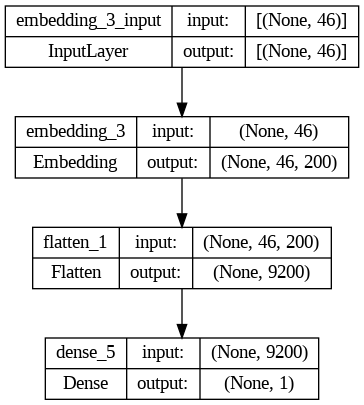

In [71]:
plot_model(model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True, expand_nested=True)

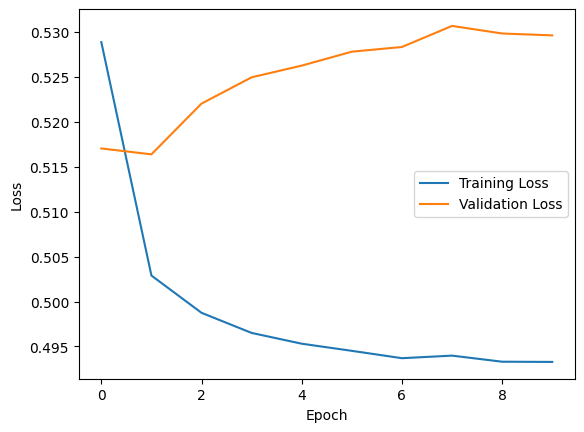

In [73]:
# Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Convolutional Neural Network (CNN):

In [76]:
modelCNN = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
    Conv1D(128, 5, activation='relu'), Conv1D(128, 3, activation='relu'), Dense(32, activation='relu'), Dense(1, activation='sigmoid')])

modelCNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
historyCNN = modelCNN.fit(X_train_padded, y_train, epochs=10, validation_data=(X_test_padded, y_test))
test_loss, test_accuracy = modelCNN.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

Epoch 1/10
4000/4000 [==============================] - 26s 6ms/step - loss: 0.6658 - acc: 0.5601 - val_loss: 0.6613 - val_acc: 0.5642
Epoch 2/10
4000/4000 [==============================] - 22s 5ms/step - loss: 0.6596 - acc: 0.5661 - val_loss: 0.6602 - val_acc: 0.5650
Epoch 3/10
4000/4000 [==============================] - 35s 9ms/step - loss: 0.6558 - acc: 0.5695 - val_loss: 0.6601 - val_acc: 0.5655
Epoch 4/10
4000/4000 [==============================] - 23s 6ms/step - loss: 0.6520 - acc: 0.5720 - val_loss: 0.6607 - val_acc: 0.5647
Epoch 5/10
4000/4000 [==============================] - 29s 7ms/step - loss: 0.6483 - acc: 0.5749 - val_loss: 0.6627 - val_acc: 0.5630
Epoch 6/10
4000/4000 [==============================] - 27s 7ms/step - loss: 0.6449 - acc: 0.5782 - val_loss: 0.6638 - val_acc: 0.5639
Epoch 7/10
4000/4000 [==============================] - 28s 7ms/step - loss: 0.6415 - acc: 0.5805 - val_loss: 0.6683 - val_acc: 0.5631
Epoch 8/10
4000/4000 [==============================] -

In [80]:
modelCNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 46, 200)           14078800  
                                                                 
 conv1d_3 (Conv1D)           (None, 42, 128)           128128    
                                                                 
 conv1d_4 (Conv1D)           (None, 40, 128)           49280     
                                                                 
 dense_8 (Dense)             (None, 40, 32)            4128      
                                                                 
 dense_9 (Dense)             (None, 40, 1)             33        
                                                                 
Total params: 14260369 (54.40 MB)
Trainable params: 181569 (709.25 KB)
Non-trainable params: 14078800 (53.71 MB)
_________________________________________________________________


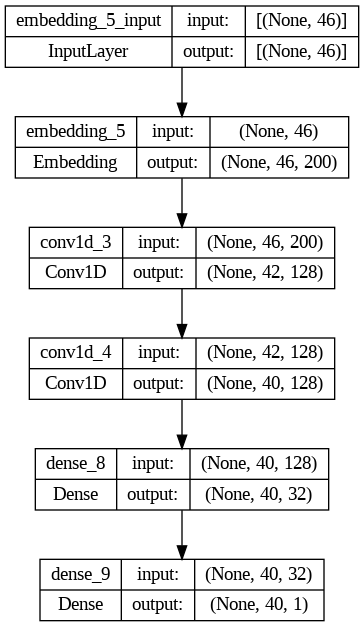

In [81]:
plot_model(modelCNN, to_file='rnn_model.png', show_shapes=True, show_layer_names=True, expand_nested=True)

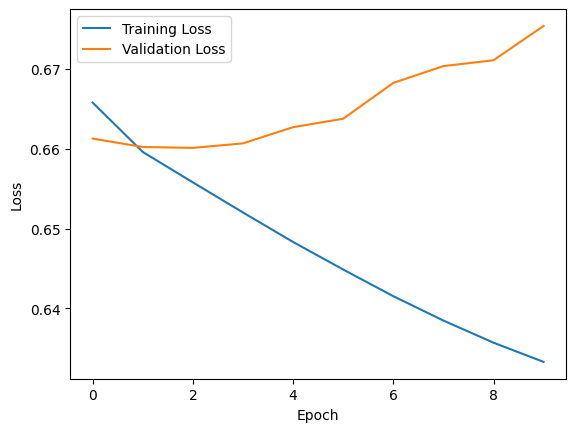

In [83]:
# Plot
plt.plot(historyCNN.history['loss'], label='Training Loss')
plt.plot(historyCNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

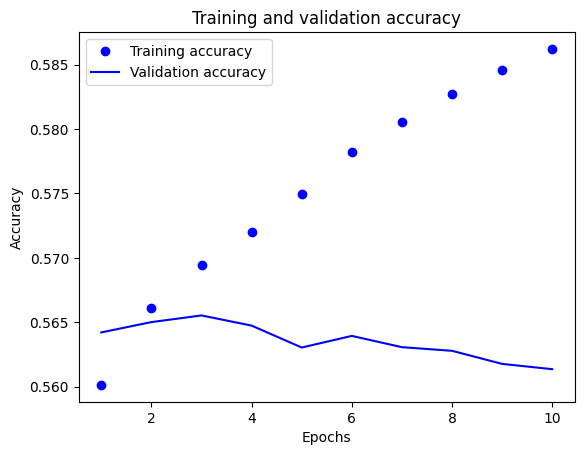

In [87]:
accuracy = historyCNN.history['acc']
val_accuracy = historyCNN.history['val_acc']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### RNN

In [88]:
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
modelRNN = Sequential()
modelRNN.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
modelRNN.add(Dense(units=1, activation='sigmoid'))
modelRNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [89]:
epochs = 10
historyRNN = modelRNN.fit(X_train_padded, y_train, epochs=epochs, validation_data=(X_test_padded, y_test))

Epoch 1/10
4000/4000 [==============================] - 58s 14ms/step - loss: 0.6864 - acc: 0.5246 - val_loss: 0.6853 - val_acc: 0.5286
Epoch 2/10
4000/4000 [==============================] - 31s 8ms/step - loss: 0.6838 - acc: 0.5323 - val_loss: 0.6853 - val_acc: 0.5291
Epoch 3/10
4000/4000 [==============================] - 32s 8ms/step - loss: 0.6826 - acc: 0.5321 - val_loss: 0.6855 - val_acc: 0.5291
Epoch 4/10
4000/4000 [==============================] - 30s 7ms/step - loss: 0.6818 - acc: 0.5326 - val_loss: 0.6861 - val_acc: 0.5287
Epoch 5/10
4000/4000 [==============================] - 35s 9ms/step - loss: 0.6813 - acc: 0.5323 - val_loss: 0.6865 - val_acc: 0.5180
Epoch 6/10
4000/4000 [==============================] - 32s 8ms/step - loss: 0.6808 - acc: 0.5316 - val_loss: 0.6868 - val_acc: 0.5287
Epoch 7/10
4000/4000 [==============================] - 31s 8ms/step - loss: 0.6804 - acc: 0.5332 - val_loss: 0.6871 - val_acc: 0.5289
Epoch 8/10
4000/4000 [==============================] 

In [90]:
test_loss, test_accuracy = modelRNN.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

1000/1000 [==============================] - 2s 2ms/step - loss: 0.6879 - acc: 0.5292
Test Accuracy: 0.5292


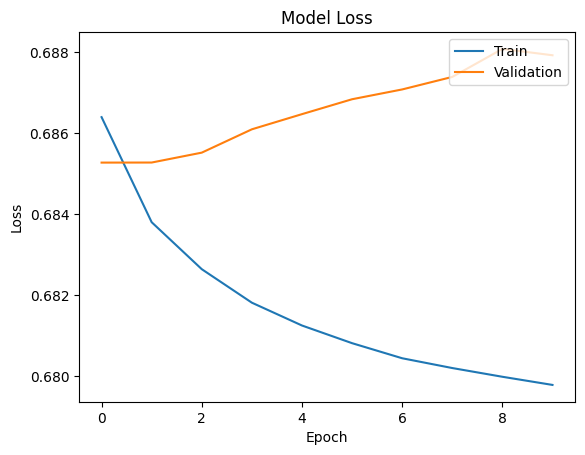

In [91]:
plt.plot(historyRNN.history['loss'])
plt.plot(historyRNN.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

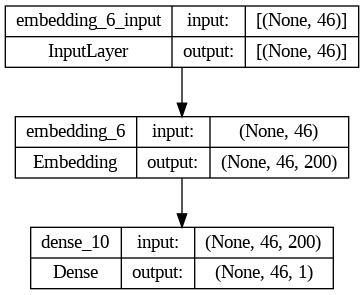

In [92]:
plot_model(modelRNN, to_file='rnn_model.png', show_shapes=True, show_layer_names=True, expand_nested=True)

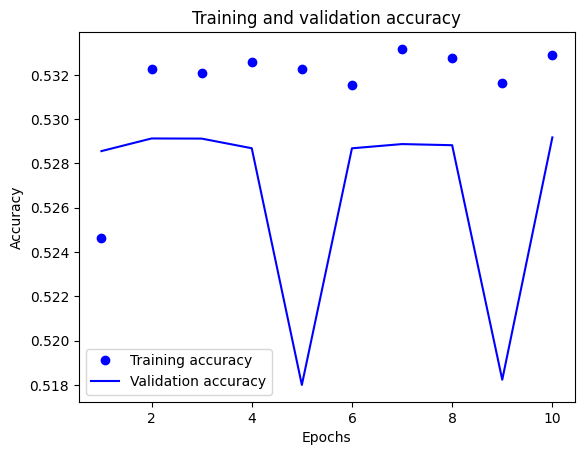

In [93]:
accuracy = historyRNN.history['acc']
val_accuracy = historyRNN.history['val_acc']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()